# Mukesh Kumar Sanodiya (30-Mar-2019)


# 23.MACHINE LEARNING - VI-Assignment-2

In [ ]:
#####################Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [76]:
# Import data
train_set=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None) 
test_set=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None) 
col_labels = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train_set.columns = col_labels 
test_set.columns = col_labels 

In [77]:
train_set.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
test_set.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [79]:
####################Clean the Data

df = pd.concat([train_set, test_set], axis=0)
dff=df
k=df
# print (df['Income'])
df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [81]:
####################REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [82]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


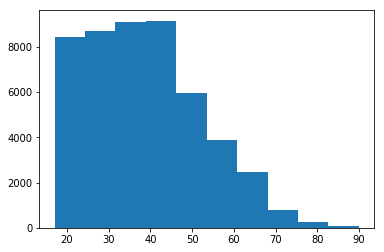

In [83]:
######################## Visualizations #############################
########################################### VISULIZATION ##################################################
###########################################################################################################
###########################################################################################################

plt.hist(dff['Age']);

dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)
#The output for the this line of code can be viewed at https://tinyurl.com/y8ddex6h


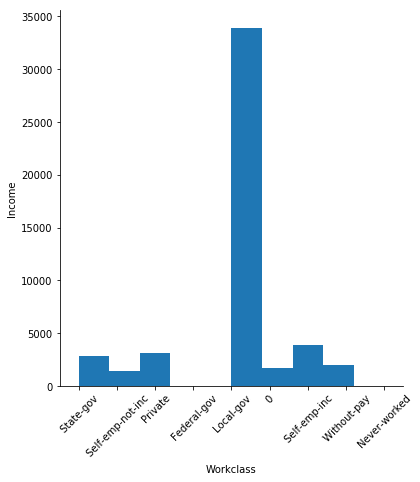

In [84]:
###################################  WORKCLASS

dff.fillna(' 0', inplace=True)

sn.factorplot(x="Workclass", y="Income", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['Workclass'].value_counts()
plt.hist(dff['Workclass']);
# The output for this line of code can be viewwed at https://tinyurl.com/y9z647j8


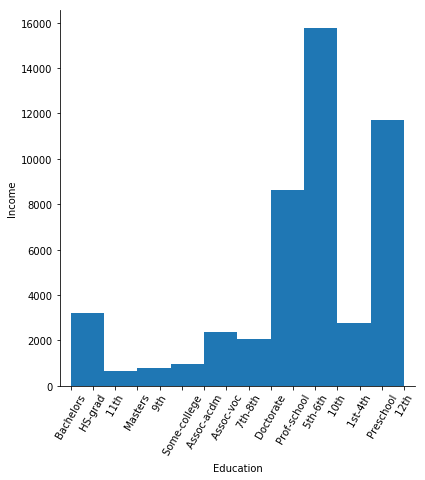

In [85]:
########################################### EDUCATION

sn.factorplot(x="Education",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);
plt.hist(dff['Education']);
#The output for this line of code can be viewed at https://tinyurl.com/y8wcleoo


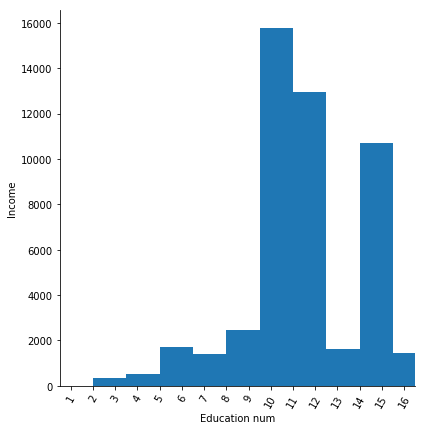

In [86]:
#########################  EDUCATION NO
sn.factorplot(x="Education num",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);
plt.hist(dff['Education num']);

#The output for this line of code can be viewed at https://tinyurl.com/y8zatgbb


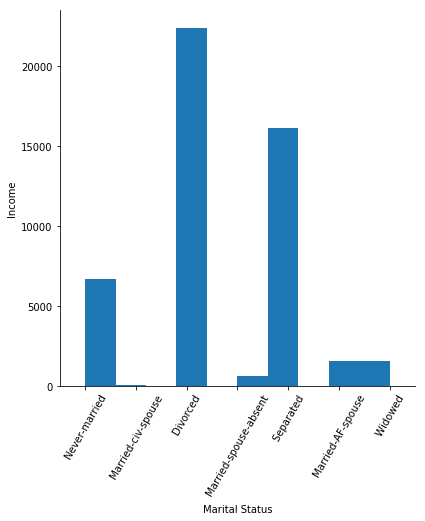

In [87]:
################################ MARITAL status
sn.factorplot(x="Marital Status",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);
plt.hist(dff['Marital Status']);
#The output for this line of code can be viewed at https://tinyurl.com/ybpggx5u


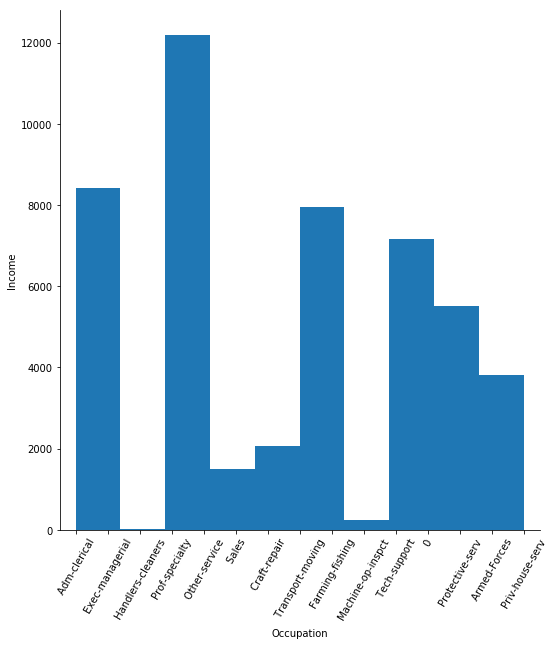

In [88]:
################################ OCCUPATION
sn.factorplot(x="Occupation",y="Income",data=dff,kind="bar", size = 8, palette = "muted")
plt.xticks(rotation=60);
plt.hist(dff['Occupation']);
#The output for this line of code can be viewed at https://tinyurl.com/yab83lf3


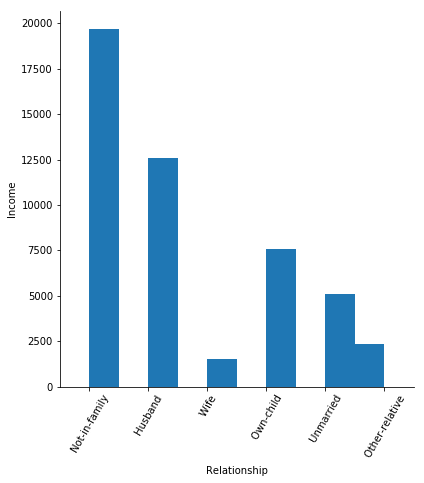

In [89]:
################################ Relationship
sn.factorplot(x="Relationship",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);
plt.hist(dff['Relationship']);
#The output for this line of code can be viewed at https://tinyurl.com/y9trdq5q


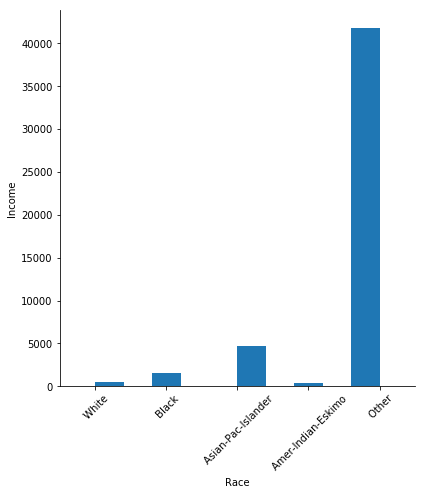

In [90]:
################################ RACE
sn.factorplot(x="Race",y="Income",data=dff,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
plt.hist(dff['Race']);
#the output for this line of code can be viewed at : https://tinyurl.com/y9hfqlkr


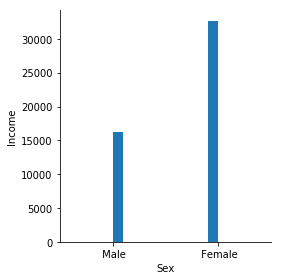

In [91]:
################################ SEX
sn.factorplot(x="Sex",y="Income",data=dff,kind="bar", size = 4, palette = "muted");
plt.hist(dff['Sex']);


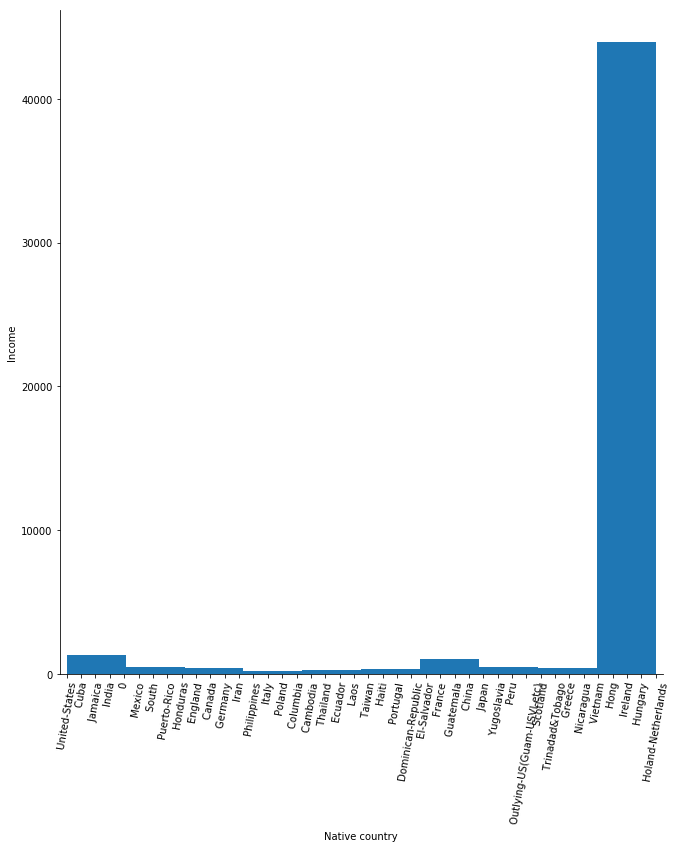

In [92]:
################################     Native county   
sn.factorplot(x="Native country",y="Income",data=dff,kind="bar", size = 10, palette = "muted")
plt.xticks(rotation=80);
plt.hist(dff['Native country']);
#Output for this line of code can be viewewd at : https://tinyurl.com/yaqwzr9d

In [93]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [94]:
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[5503 2778]
 [ 163 1325]]
             precision    recall  f1-score   support

          0       0.97      0.66      0.79      8281
          1       0.32      0.89      0.47      1488

avg / total       0.87      0.70      0.74      9769

The Accuracy for Logistic Regression is 0.6989456443853005


In [95]:
################LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[7949  332]
 [1052  436]]
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      8281
          1       0.57      0.29      0.39      1488

avg / total       0.84      0.86      0.84      9769

The Accuracy for LDA is 0.8583273620636708


In [96]:
########################################LINEAR REGRESSION#######################

from sklearn import linear_model
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_

0.16233441081774524

In [97]:

##########Results

print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
print("The Accuracy for Linear Regression is {}".format(LA))

[[8188   93]
 [1347  141]]
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      8281
          1       0.60      0.09      0.16      1488

avg / total       0.82      0.85      0.80      9769

The Accuracy for Linear Regression is 0.8525949431876344


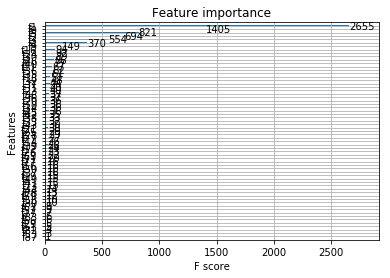

training set auc: 0.8684614597195209
test set auc: 0.8684614597195209
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8684614597195209


In [98]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))